Decision tree

Columns in the dataset: ['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Missing values in dataset:
row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64
Temperature Prediction MAE: 0.00
Temperature Prediction MSE: 0.00
Temperature Prediction R-squar

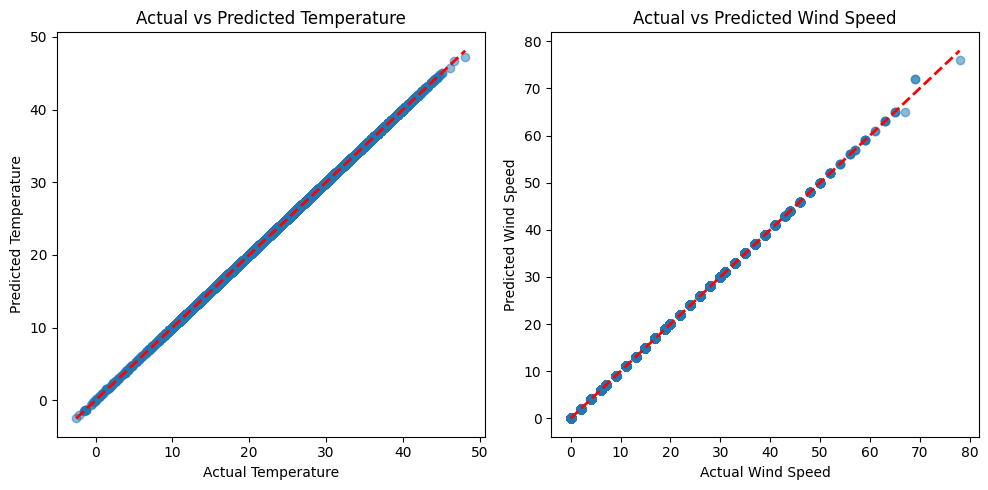

{'Predicted Max Temperature (°C)': 25.0, 'Predicted Wind Speed (km/h)': 24.0, 'Prediction Time (seconds)': 0.0005192756652832031}


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Weather Training Data.csv')  # Adjust the file path as necessary

# Print column names to verify
print("Columns in the dataset:", df.columns.tolist())

# Check for missing values
print("Missing values in dataset:")
print(df.isna().sum())

# Drop rows with missing target values or fill missing values as necessary
df = df.dropna(subset=['MaxTemp', 'WindSpeed3pm'])  # Drop rows with NaN in target columns

# Example of feature and target selection (update as necessary)
features = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
            'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
            'RainToday']
target_temp = 'MaxTemp'
target_wind = 'WindSpeed3pm'  # Update to the correct column name if necessary

# Preprocessing - Encoding categorical features
label_encoder = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    df[col] = label_encoder.fit_transform(df[col])

# Splitting the data into training and testing sets
X = df[features]
y_temp = df[target_temp]
y_wind = df[target_wind]

# Split the data for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_temp = scaler.fit_transform(X_train_temp)
X_test_temp = scaler.transform(X_test_temp)
X_train_wind = scaler.fit_transform(X_train_wind)
X_test_wind = scaler.transform(X_test_wind)

# Measure Training Time
start_time = time.time()

# Train Decision Tree Regressors
temp_model = DecisionTreeRegressor(random_state=42)
temp_model.fit(X_train_temp, y_train_temp)

wind_model = DecisionTreeRegressor(random_state=42)
wind_model.fit(X_train_wind, y_train_wind)

end_time = time.time()
training_time = end_time - start_time

# Measure Prediction Time for the Test Set
start_time = time.time()

# Predictions on Test Data
temp_pred = temp_model.predict(X_test_temp)
wind_pred = wind_model.predict(X_test_wind)

end_time = time.time()
prediction_time = end_time - start_time

# Calculate mean prediction time per sample
mean_prediction_time = prediction_time / len(X_test_temp)  # assuming same length for all targets

# Calculate Evaluation Metrics
temp_mae = mean_absolute_error(y_test_temp, temp_pred)
temp_mse = mean_squared_error(y_test_temp, temp_pred)
temp_r2 = r2_score(y_test_temp, temp_pred)

wind_mae = mean_absolute_error(y_test_wind, wind_pred)
wind_mse = mean_squared_error(y_test_wind, wind_pred)
wind_r2 = r2_score(y_test_wind, wind_pred)

# Print Evaluation Metrics
print(f'Temperature Prediction MAE: {temp_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_r2:.2f}')

# Print Timing Metrics
print(f'Training Time: {training_time:.4f} seconds')
print(f'Total Prediction Time: {prediction_time:.4f} seconds')
print(f'Mean Prediction Time per Sample: {mean_prediction_time:.6f} seconds')

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(10, 5))

# Temperature
plt.subplot(1, 2, 1)
plt.scatter(y_test_temp, temp_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

# Wind Speed
plt.subplot(1, 2, 2)
plt.scatter(y_test_wind, wind_pred, alpha=0.5)
plt.plot([y_test_wind.min(), y_test_wind.max()], [y_test_wind.min(), y_test_wind.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')

plt.tight_layout()
plt.show()

# Modified Prediction on New Data
def predict_weather(new_data):
    # Convert new data into a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Function to handle unseen labels
    def encode_or_default(label, encoder):
        try:
            return encoder.transform([label])[0]
        except ValueError:
            # Return the most common label or a default value
            return encoder.transform([encoder.classes_[0]])[0]

    # Encode categorical features, handling unseen labels
    for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
        new_data_df[col] = new_data_df[col].apply(lambda x: encode_or_default(x, label_encoder))

    # Standardize features
    new_data_scaled = scaler.transform(new_data_df)

    # Predict Temperature and Wind Speed
    start_time = time.time()

    temp_pred = temp_model.predict(new_data_scaled)
    wind_pred = wind_model.predict(new_data_scaled)

    end_time = time.time()
    prediction_time = end_time - start_time

    return {
        'Predicted Max Temperature (°C)': temp_pred[0],
        'Predicted Wind Speed (km/h)': wind_pred[0],
        'Prediction Time (seconds)': prediction_time
    }

# Example of predicting weather for a new input
new_weather_data = {
    'MinTemp': 15.0,
    'MaxTemp': 25.0,
    'Evaporation': 5.0,
    'Sunshine': 7.0,
    'WindGustSpeed': 40.0,
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 25.0,
    'Humidity9am': 70.0,
    'Humidity3pm': 50.0,
    'Pressure9am': 1010.0,
    'Pressure3pm': 1008.0,
    'Cloud9am': 3.0,
    'Cloud3pm': 5.0,
    'Temp9am': 20.0,
    'Temp3pm': 24.0,
    'Location': 'Albury',
    'WindGustDir': 'N',
    'WindDir9am': 'NW',
    'WindDir3pm': 'N',
    'RainToday': 'No'
}

predicted_weather = predict_weather(new_weather_data)
print(predicted_weather)


Model source code(Decision tree)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Weather Training Data.csv')  # Replace with your actual file path

# Drop rows with missing values in target columns
df_clean = df.dropna(subset=['MaxTemp', 'WindSpeed3pm'])

# Define target columns
target_temp = 'MaxTemp'
target_wind = 'WindSpeed3pm'

# Define numerical feature columns
numerical_features = [
    'MinTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm'
]

# Define categorical columns to be one-hot encoded
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# One-hot encode categorical columns, dropping the first category to avoid multicollinearity
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

# Dynamically create the feature columns list by combining numerical and encoded categorical features
encoded_categorical_features = [col for col in df_clean.columns if any(cat + '_' in col for cat in categorical_columns)]
feature_columns = numerical_features + encoded_categorical_features

# Split the data into features and targets
X = df_clean[feature_columns]
y_temp = df_clean[target_temp]
y_wind = df_clean[target_wind]

# Split into training and testing sets for temperature prediction
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X, y_temp, test_size=0.2, random_state=42
)

# Split into training and testing sets for wind speed prediction
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(
    X, y_wind, test_size=0.2, random_state=42
)

# Standardize the features for temperature prediction
scaler_temp = StandardScaler()
X_train_temp_scaled = scaler_temp.fit_transform(X_train_temp)
X_test_temp_scaled = scaler_temp.transform(X_test_temp)

# Standardize the features for wind speed prediction
scaler_wind = StandardScaler()
X_train_wind_scaled = scaler_wind.fit_transform(X_train_wind)
X_test_wind_scaled = scaler_wind.transform(X_test_wind)

# Train the Decision Tree Regressor for temperature prediction
temp_model = DecisionTreeRegressor(
    max_depth=10,           # Limit tree depth
    random_state=42
)
temp_model.fit(X_train_temp_scaled, y_train_temp)

# Train the Decision Tree Regressor for wind speed prediction
wind_model = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)
wind_model.fit(X_train_wind_scaled, y_train_wind)

# Save the trained models and scalers for future use
joblib.dump(temp_model, 'temp_model.pkl')
joblib.dump(wind_model, 'wind_model.pkl')
joblib.dump(scaler_temp, 'scaler_temp.pkl')
joblib.dump(scaler_wind, 'scaler_wind.pkl')

# Function to predict either temperature or wind speed based on location
def predict_weather_by_location(location, prediction_type='temperature'):
    # Check if the location exists in the dataset
    available_locations = df['Location'].unique()

    if location not in available_locations:
        return f"The location '{location}' is not in the dataset. Please choose from the available locations."

    # Get the rows from the dataset for the specific location, only for numerical columns
    numerical_data = df[df['Location'] == location][numerical_features]

    if numerical_data.empty:
        return f"No data found for location: {location}"

    # Calculate the mean for numerical features
    location_numerical_means = numerical_data.mean()

    # Define default values for categorical columns
    categorical_values = {
        'Location': location,
        'WindGustDir': 'N',   # You can replace these with more appropriate values if needed
        'WindDir9am': 'NW',
        'WindDir3pm': 'N',
        'RainToday': 'No'
    }

    # Combine numerical means and categorical values into a single dictionary
    default_weather_data = {**location_numerical_means.to_dict(), **categorical_values}

    # Convert the dictionary to a DataFrame
    new_data_df = pd.DataFrame([default_weather_data])

    # One-hot encode the new data to match the trained model's feature set
    new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_columns, drop_first=True)

    # Ensure all required columns are present, missing columns are filled with 0
    for col in encoded_categorical_features:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0

    # Reorder the columns to match the training data
    new_data_aligned = new_data_encoded[encoded_categorical_features]
    # Combine numerical and encoded categorical features
    new_data_final = pd.concat([new_data_df[numerical_features], new_data_aligned], axis=1)

    # Ensure the feature order matches
    new_data_final = new_data_final[feature_columns]

    # Standardize the new data based on the training data's scaling
    if prediction_type == 'temperature':
        new_data_scaled = scaler_temp.transform(new_data_final)
        temp_pred = temp_model.predict(new_data_scaled)
        return f'Predicted Max Temperature (°C) for {location}: {temp_pred[0]:.2f}'
    elif prediction_type == 'windspeed':
        new_data_scaled = scaler_wind.transform(new_data_final)
        wind_pred = wind_model.predict(new_data_scaled)
        return f'Predicted Wind Speed (km/h) for {location}: {wind_pred[0]:.2f}'
    else:
        return "Invalid prediction type. Choose either 'temperature' or 'windspeed'."

# Interactive prediction
if __name__ == "__main__":
    print("=== Weather Prediction ===")
    location_input = input("Enter the location: ").strip()
    prediction_input = input("Do you want to predict 'temperature' or 'windspeed'?: ").strip().lower()

    # Validate prediction type
    if prediction_input not in ['temperature', 'windspeed']:
        print("Invalid prediction type. Please choose either 'temperature' or 'windspeed'.")
    else:
        prediction_result = predict_weather_by_location(location_input, prediction_input)
        print(prediction_result)

=== Weather Prediction ===
Enter the location: Albury
Do you want to predict 'temperature' or 'windspeed'?: windspeed
Predicted Wind Speed (km/h) for Albury: 15.00


Random forest

Columns in the dataset: ['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Missing values in dataset:
row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64
Temperature Prediction MAE: 0.00
Temperature Prediction MSE: 0.00
Temperature Prediction R-squar

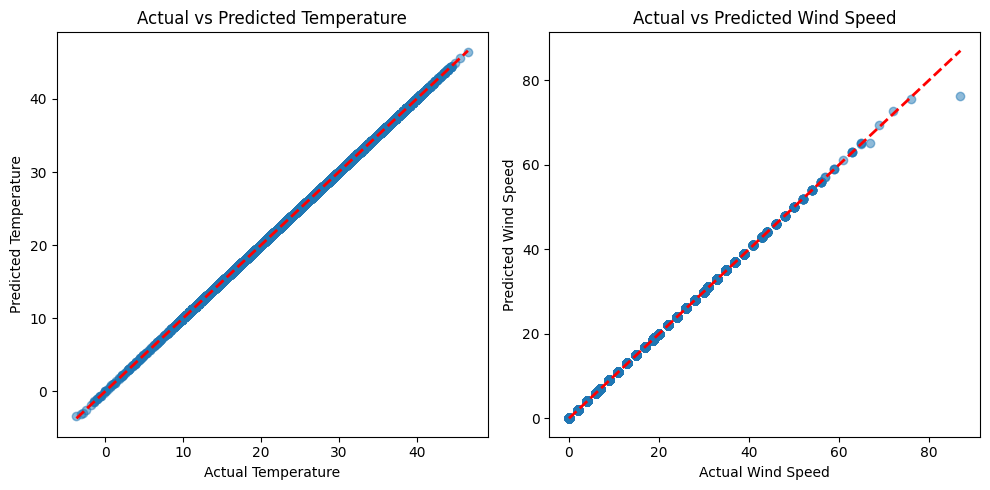

{'Predicted Max Temperature (°C)': 25.0, 'Predicted Wind Speed (km/h)': 26.0, 'Prediction Time (seconds)': 0.06389403343200684}


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Weather Training Data.csv')  # Adjust the file path as necessary

# Print column names to verify
print("Columns in the dataset:", df.columns.tolist())

# Check for missing values
print("Missing values in dataset:")
print(df.isna().sum())

# Drop columns with excessive missing values or handle missing values in target columns
df = df.drop(columns=['row ID'])  # Drop non-predictive column if necessary

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Re-add categorical columns
df_imputed = pd.concat([df_imputed, df.select_dtypes(include=['object'])], axis=1)

# Example of feature and target selection (update as necessary)
features = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
            'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
            'RainToday']
target_temp = 'MaxTemp'
target_wind = 'WindSpeed3pm'

# Preprocessing - Encoding categorical features
label_encoder = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    df_imputed[col] = label_encoder.fit_transform(df_imputed[col])

# Splitting the data into training and testing sets
X = df_imputed[features]
y_temp = df_imputed[target_temp]
y_wind = df_imputed[target_wind]

# Split the data for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_temp = scaler.fit_transform(X_train_temp)
X_test_temp = scaler.transform(X_test_temp)
X_train_wind = scaler.fit_transform(X_train_wind)
X_test_wind = scaler.transform(X_test_wind)

# Measure Training Time
start_time = time.time()

# Train Random Forest Regressors
temp_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
temp_model.fit(X_train_temp, y_train_temp)

wind_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
wind_model.fit(X_train_wind, y_train_wind)

end_time = time.time()
training_time = end_time - start_time

# Measure Prediction Time for the Test Set
start_time = time.time()

# Predictions on Test Data
temp_pred = temp_model.predict(X_test_temp)
wind_pred = wind_model.predict(X_test_wind)

end_time = time.time()
prediction_time = end_time - start_time

# Calculate mean prediction time per sample
mean_prediction_time = prediction_time / len(X_test_temp)  # assuming same length for all targets

# Calculate Evaluation Metrics
temp_mae = mean_absolute_error(y_test_temp, temp_pred)
temp_mse = mean_squared_error(y_test_temp, temp_pred)
temp_r2 = r2_score(y_test_temp, temp_pred)

wind_mae = mean_absolute_error(y_test_wind, wind_pred)
wind_mse = mean_squared_error(y_test_wind, wind_pred)
wind_r2 = r2_score(y_test_wind, wind_pred)

# Print Evaluation Metrics
print(f'Temperature Prediction MAE: {temp_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_r2:.2f}')

# Print Timing Metrics
print(f'Training Time: {training_time:.4f} seconds')
print(f'Total Prediction Time: {prediction_time:.4f} seconds')
print(f'Mean Prediction Time per Sample: {mean_prediction_time:.6f} seconds')

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(10, 5))

# Temperature
plt.subplot(1, 2, 1)
plt.scatter(y_test_temp, temp_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

# Wind Speed
plt.subplot(1, 2, 2)
plt.scatter(y_test_wind, wind_pred, alpha=0.5)
plt.plot([y_test_wind.min(), y_test_wind.max()], [y_test_wind.min(), y_test_wind.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')

plt.tight_layout()
plt.show()

# Modified Prediction on New Data
def predict_weather(new_data):
    # Convert new data into a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Function to handle unseen labels
    def encode_or_default(label, encoder):
        try:
            return encoder.transform([label])[0]
        except ValueError:
            # Return the most common label or a default value
            return encoder.transform([encoder.classes_[0]])[0]

    # Encode categorical features, handling unseen labels
    for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
        new_data_df[col] = new_data_df[col].apply(lambda x: encode_or_default(x, label_encoder))

    # Standardize features
    new_data_scaled = scaler.transform(new_data_df)

    # Predict Temperature and Wind Speed
    start_time = time.time()

    temp_pred = temp_model.predict(new_data_scaled)
    wind_pred = wind_model.predict(new_data_scaled)

    end_time = time.time()
    prediction_time = end_time - start_time

    return {
        'Predicted Max Temperature (°C)': temp_pred[0],
        'Predicted Wind Speed (km/h)': wind_pred[0],
        'Prediction Time (seconds)': prediction_time
    }

# Example of predicting weather for a new input
new_weather_data = {
    'MinTemp': 15.0,
    'MaxTemp': 25.0,
    'Evaporation': 5.0,
    'Sunshine': 7.0,
    'WindGustSpeed': 40.0,
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 25.0,
    'Humidity9am': 70.0,
    'Humidity3pm': 50.0,
    'Pressure9am': 1010.0,
    'Pressure3pm': 1008.0,
    'Cloud9am': 3.0,
    'Cloud3pm': 5.0,
    'Temp9am': 20.0,
    'Temp3pm': 24.0,
    'Location': 'Albury',
    'WindGustDir': 'N',
    'WindDir9am': 'NW',
    'WindDir3pm': 'N',
    'RainToday': 'No'
}

predicted_weather = predict_weather(new_weather_data)
print(predicted_weather)


Model source code(Random forest)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Weather Training Data.csv')  # Replace with your actual file path

# Drop rows with missing values in target columns
df_clean = df.dropna(subset=['MaxTemp', 'WindSpeed3pm'])

# Define target columns
target_temp = 'MaxTemp'
target_wind = 'WindSpeed3pm'

# Define numerical feature columns
numerical_features = [
    'MinTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm'
]

# Define categorical columns to be one-hot encoded
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# One-hot encode categorical columns, dropping the first category to avoid multicollinearity
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

# Dynamically create the feature columns list by combining numerical and encoded categorical features
encoded_categorical_features = [col for col in df_clean.columns if any(cat + '_' in col for cat in categorical_columns)]
feature_columns = numerical_features + encoded_categorical_features

# Split the data into features and targets
X = df_clean[feature_columns]
y_temp = df_clean[target_temp]
y_wind = df_clean[target_wind]

# Split into training and testing sets for temperature prediction
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X, y_temp, test_size=0.2, random_state=42
)

# Split into training and testing sets for wind speed prediction
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(
    X, y_wind, test_size=0.2, random_state=42
)

# Standardize the features for temperature prediction
scaler_temp = StandardScaler()
X_train_temp_scaled = scaler_temp.fit_transform(X_train_temp)
X_test_temp_scaled = scaler_temp.transform(X_test_temp)

# Standardize the features for wind speed prediction
scaler_wind = StandardScaler()
X_train_wind_scaled = scaler_wind.fit_transform(X_train_wind)
X_test_wind_scaled = scaler_wind.transform(X_test_wind)

# Train the Random Forest Regressor for temperature prediction
temp_model = RandomForestRegressor(
    n_estimators=50,        # Reduced number of trees
    max_features='sqrt',    # Limit number of features
    max_depth=10,           # Limit tree depth
    random_state=42,
    n_jobs=-1                # Utilize all CPU cores
)
temp_model.fit(X_train_temp_scaled, y_train_temp)

# Train the Random Forest Regressor for wind speed prediction
wind_model = RandomForestRegressor(
    n_estimators=50,
    max_features='sqrt',
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
wind_model.fit(X_train_wind_scaled, y_train_wind)

# Save the trained models and scalers for future use
joblib.dump(temp_model, 'temp_model.pkl')
joblib.dump(wind_model, 'wind_model.pkl')
joblib.dump(scaler_temp, 'scaler_temp.pkl')
joblib.dump(scaler_wind, 'scaler_wind.pkl')

# Function to predict either temperature or wind speed based on location
def predict_weather_by_location(location, prediction_type='temperature'):
    # Check if the location exists in the dataset
    available_locations = df['Location'].unique()

    if location not in available_locations:
        return f"The location '{location}' is not in the dataset. Please choose from the available locations."

    # Get the rows from the dataset for the specific location, only for numerical columns
    numerical_data = df[df['Location'] == location][numerical_features]

    if numerical_data.empty:
        return f"No data found for location: {location}"

    # Calculate the mean for numerical features
    location_numerical_means = numerical_data.mean()

    # Define default values for categorical columns
    categorical_values = {
        'Location': location,
        'WindGustDir': 'N',   # You can replace these with more appropriate values if needed
        'WindDir9am': 'NW',
        'WindDir3pm': 'N',
        'RainToday': 'No'
    }

    # Combine numerical means and categorical values into a single dictionary
    default_weather_data = {**location_numerical_means.to_dict(), **categorical_values}

    # Convert the dictionary to a DataFrame
    new_data_df = pd.DataFrame([default_weather_data])

    # One-hot encode the new data to match the trained model's feature set
    new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_columns, drop_first=True)

    # Ensure all required columns are present, missing columns are filled with 0
    for col in encoded_categorical_features:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0

    # Reorder the columns to match the training data
    new_data_aligned = new_data_encoded[encoded_categorical_features]
    # Combine numerical and encoded categorical features
    new_data_final = pd.concat([new_data_df[numerical_features], new_data_aligned], axis=1)

    # Ensure the feature order matches
    new_data_final = new_data_final[feature_columns]

    # Standardize the new data based on the training data's scaling
    if prediction_type == 'temperature':
        new_data_scaled = scaler_temp.transform(new_data_final)
        temp_pred = temp_model.predict(new_data_scaled)
        return f'Predicted Max Temperature (°C) for {location}: {temp_pred[0]:.2f}'
    elif prediction_type == 'windspeed':
        new_data_scaled = scaler_wind.transform(new_data_final)
        wind_pred = wind_model.predict(new_data_scaled)
        return f'Predicted Wind Speed (km/h) for {location}: {wind_pred[0]:.2f}'
    else:
        return "Invalid prediction type. Choose either 'temperature' or 'windspeed'."

# Interactive prediction
if __name__ == "__main__":
    print("=== Weather Prediction ===")
    location_input = input("Enter the location: ").strip()
    prediction_input = input("Do you want to predict 'temperature' or 'windspeed'?: ").strip().lower()

    # Validate prediction type
    if prediction_input not in ['temperature', 'windspeed']:
        print("Invalid prediction type. Please choose either 'temperature' or 'windspeed'.")
    else:
        prediction_result = predict_weather_by_location(location_input, prediction_input)
        print(prediction_result)



=== Weather Prediction ===
Enter the location: Albury
Do you want to predict 'temperature' or 'windspeed'?: windspeed
Predicted Wind Speed (km/h) for Albury: 15.41


Splitting data set

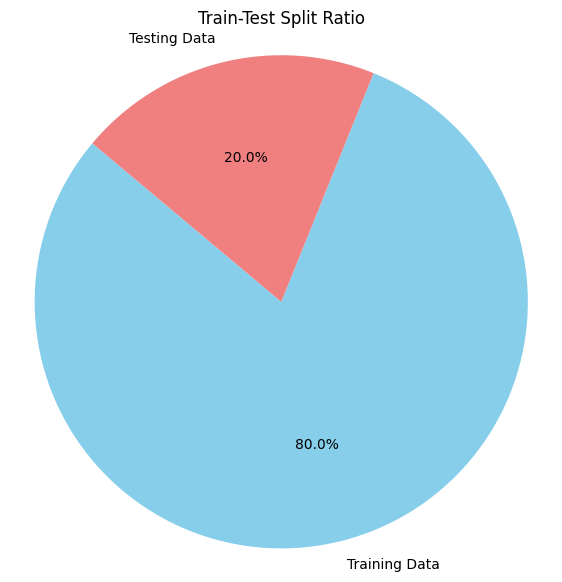

In [ ]:
import matplotlib.pyplot as plt

# Define the train and test split ratios
train_ratio = 0.8
test_ratio = 0.2

# Data to plot
labels = 'Training Data', 'Testing Data'
sizes = [train_ratio, test_ratio]
colors = ['skyblue', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Train-Test Split Ratio')

# Show the plot
plt.show()


shows the data from the CSV file

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/Weather Training Data.csv'
weather_data = pd.read_csv(file_path)

# Display the entire dataset
print(weather_data)


          row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0           Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1           Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2           Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3           Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4           Row4   Albury      7.7     26.7       0.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
99511  Row101816    Uluru      8.0     20.7       0.0          NaN       NaN   
99512  Row101817    Uluru      3.5     21.8       0.0          NaN       NaN   
99513  Row101818    Uluru      2.8     23.4       0.0          NaN       NaN   
99514  Row101819    Uluru      3.6     25.3       0.0          NaN       NaN   
99515  Row101820    Uluru      5.4     26.9       0.0          NaN       NaN   

      WindGustDir  WindGustSpeed WindDi

shows the data of first few rows from the CSV file

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Show the first few rows of the dataset
print(weather_data.head())


  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN 

shows the data of last few rows from the CSV file

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Show the last few rows of the dataset
print(weather_data.tail())


          row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
99511  Row101816    Uluru      8.0     20.7       0.0          NaN       NaN   
99512  Row101817    Uluru      3.5     21.8       0.0          NaN       NaN   
99513  Row101818    Uluru      2.8     23.4       0.0          NaN       NaN   
99514  Row101819    Uluru      3.6     25.3       0.0          NaN       NaN   
99515  Row101820    Uluru      5.4     26.9       0.0          NaN       NaN   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
99511         ESE           41.0         SE  ...        56.0         32.0   
99512           E           31.0        ESE  ...        59.0         27.0   
99513           E           31.0         SE  ...        51.0         24.0   
99514         NNW           22.0         SE  ...        56.0         21.0   
99515           N           37.0         SE  ...        53.0         24.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Tem

shows the description about the Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Show the description of the dataset
print(weather_data.describe())


            MinTemp       MaxTemp      Rainfall  Evaporation      Sunshine  \
count  99073.000000  99286.000000  98537.000000  56985.00000  52199.000000   
mean      12.176266     23.218513      2.353024      5.46132      7.615090   
std        6.390882      7.115072      8.487866      4.16249      3.783008   
min       -8.500000     -4.100000      0.000000      0.00000      0.000000   
25%        7.600000     17.900000      0.000000      2.60000      4.800000   
50%       12.000000     22.600000      0.000000      4.80000      8.400000   
75%       16.800000     28.200000      0.800000      7.40000     10.600000   
max       33.900000     48.100000    371.000000     86.20000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93036.000000  98581.000000  97681.000000  98283.000000  97010.000000   
mean       39.976966     14.004849     18.650464     68.866376     51.433296   
std        13.581524      8.902323      8.801827     19.0

shows the information about the data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Show the information about the dataset
print(weather_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

checks the null value of my data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Check for null values in the dataset
null_values = weather_data.isnull().sum()

# Display the null values count per column
print(null_values)


row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


Decision Tree Visualization

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        4

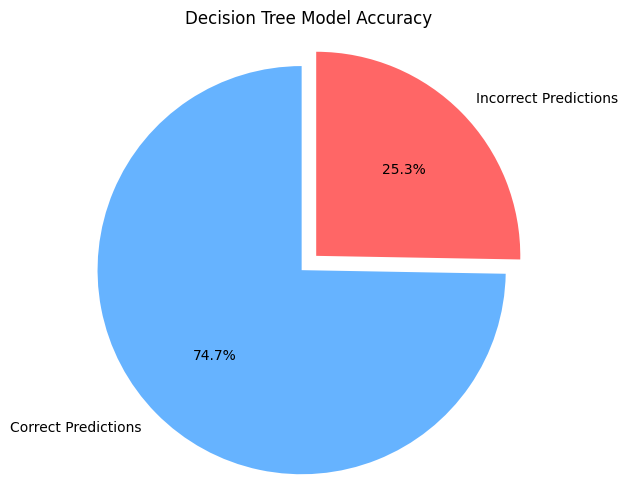

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Check if columns exist and inspect first few rows
print(weather_data.columns)  # Check if 'MinTemp', 'MaxTemp', 'RainToday' are present
print(weather_data.head())   # Look at the first few rows to ensure data is clean

# Ensure 'RainToday' is present and drop rows with missing values
weather_data_clean = weather_data[['MinTemp', 'MaxTemp', 'RainToday']].dropna()

# Check unique values in 'RainToday'
print(weather_data_clean['RainToday'].unique())  # Check for possible values ('No', 'Yes')

# Convert 'RainToday' to a binary variable (No = 0, Yes = 1)
weather_data_clean['RainToday'] = weather_data_clean['RainToday'].map({'No': 0, 'Yes': 1})

# Features (X) and target (y)
X = weather_data_clean[['MinTemp', 'MaxTemp']]
y = weather_data_clean['RainToday']

# Check for empty data after cleaning
if X.empty or y.empty:
    raise ValueError("Data is empty after cleaning. Check for missing or invalid values.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
incorrect = 1 - accuracy

# Print accuracy for debugging
print(f"Accuracy: {accuracy:.4f}, Incorrect: {incorrect:.4f}")

# Pie chart for accuracy visualization
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, incorrect]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0))
plt.title('Decision Tree Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Random Forest Visualization

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        4

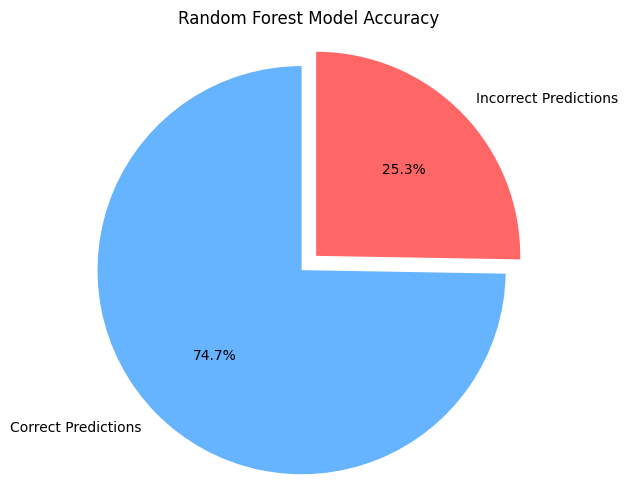

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Check the structure of the dataset
print(weather_data.columns)  # Ensure 'MinTemp', 'MaxTemp', 'RainToday' are present
print(weather_data.head())   # Inspect the first few rows

# Drop rows with missing values for simplicity
weather_data_clean = weather_data[['MinTemp', 'MaxTemp', 'RainToday']].dropna()

# Check unique values in 'RainToday'
print(weather_data_clean['RainToday'].unique())  # Ensure it contains only 'No' and 'Yes'

# Convert 'RainToday' to a binary variable (No = 0, Yes = 1)
weather_data_clean['RainToday'] = weather_data_clean['RainToday'].map({'No': 0, 'Yes': 1})

# Features (X) and target (y)
X = weather_data_clean[['MinTemp', 'MaxTemp']]
y = weather_data_clean['RainToday']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
incorrect = 1 - accuracy

# Print accuracy for debugging
print(f"Accuracy: {accuracy:.4f}, Incorrect: {incorrect:.4f}")

# Pie chart for accuracy visualization
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, incorrect]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0))
plt.title('Random Forest Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Distribution of Maximum Temperature

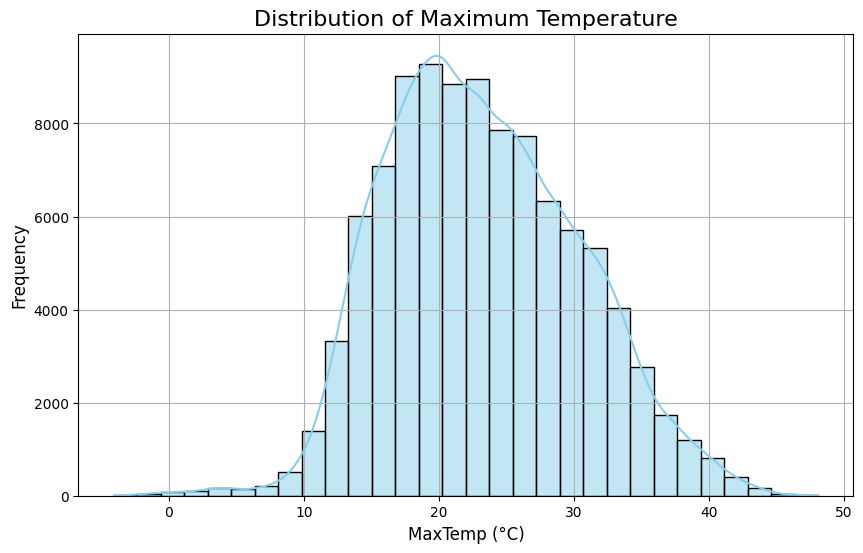

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Check if 'MaxTemp' exists in the dataset
if 'MaxTemp' not in weather_data.columns:
    raise ValueError("The 'MaxTemp' column is missing from the dataset.")

# Drop rows with missing 'MaxTemp' values
weather_data_clean = weather_data[['MaxTemp']].dropna()

# Plot distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(weather_data_clean['MaxTemp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Maximum Temperature', fontsize=16)
plt.xlabel('MaxTemp (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


Distribution of Wind Speed at 3 PM

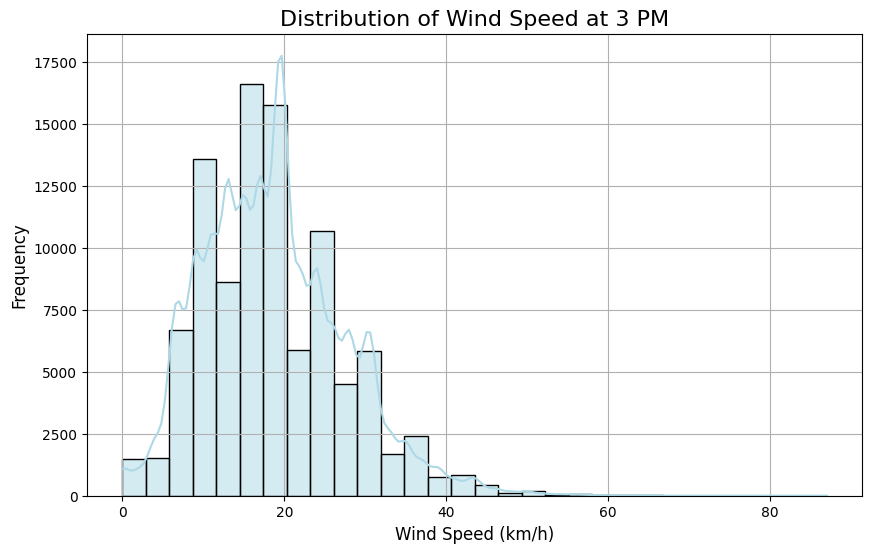

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Define the correct wind speed column name
wind_speed_column = 'WindSpeed3pm'  # Corrected to match your dataset

# Check if the column exists in the dataset
if wind_speed_column not in weather_data.columns:
    raise ValueError(f"The '{wind_speed_column}' column is missing from the dataset.")

# Drop rows with missing values for 'WindSpeed3pm'
weather_data_clean = weather_data[[wind_speed_column]].dropna()

# Plot distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(weather_data_clean[wind_speed_column], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Wind Speed at 3 PM', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


Distribution of Humidity at 3 PM

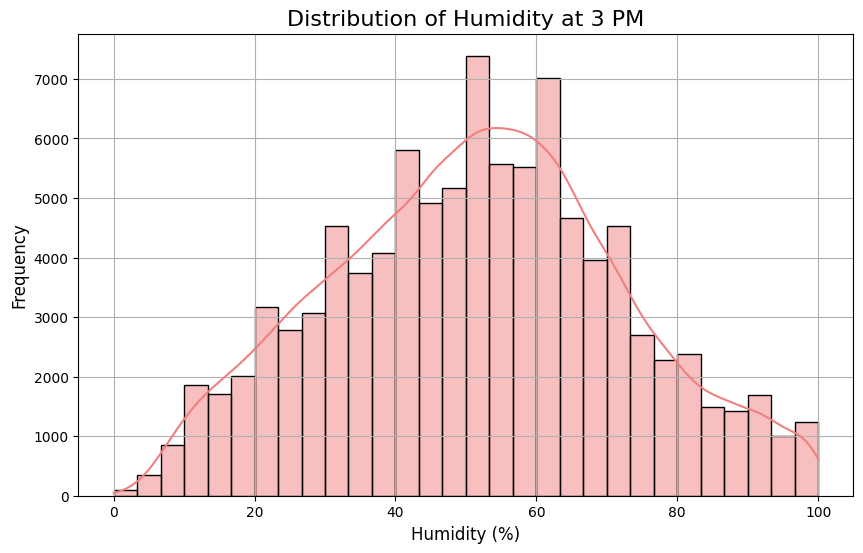

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Define the humidity column name
humidity_column = 'Humidity3pm'  # Correct column name based on your dataset

# Check if the column exists in the dataset
if humidity_column not in weather_data.columns:
    raise ValueError(f"The '{humidity_column}' column is missing from the dataset.")

# Drop rows with missing values for 'Humidity3pm'
weather_data_clean = weather_data[[humidity_column]].dropna()

# Plot distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(weather_data_clean[humidity_column], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Humidity at 3 PM', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


Relationship Between Maximum Temperature and Wind Speed

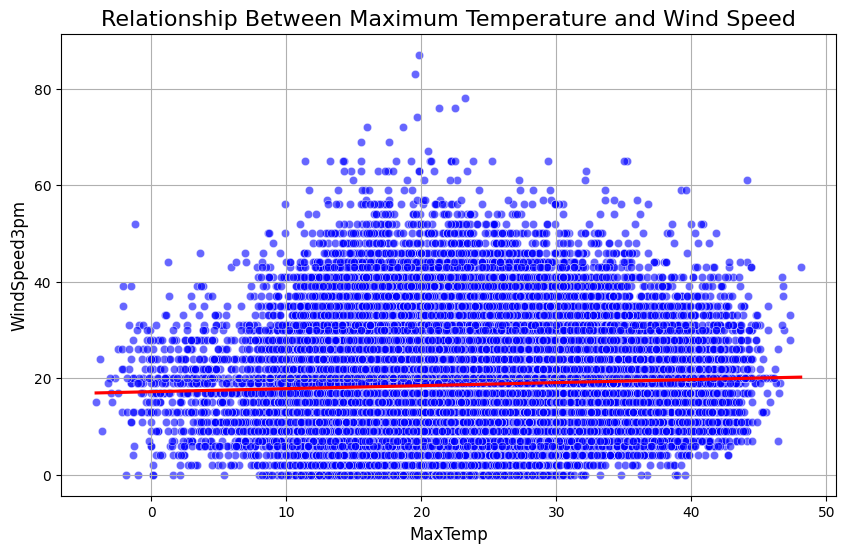

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Define the columns for maximum temperature and wind speed
max_temp_column = 'MaxTemp'  # Maximum temperature column
wind_speed_column = 'WindSpeed3pm'  # Wind speed column

# Check if the columns exist in the dataset
if max_temp_column not in weather_data.columns:
    raise ValueError(f"The '{max_temp_column}' column is missing from the dataset.")

if wind_speed_column not in weather_data.columns:
    raise ValueError(f"The '{wind_speed_column}' column is missing from the dataset.")

# Drop rows with missing values for 'MaxTemp' and 'WindSpeed3pm'
weather_data_clean = weather_data[[max_temp_column, wind_speed_column]].dropna()

# Plot the relationship using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data_clean, x=max_temp_column, y=wind_speed_column, color='blue', alpha=0.6)
plt.title('Relationship Between Maximum Temperature and Wind Speed', fontsize=16)
plt.xlabel('Maximum Temperature (°C)', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.grid(True)

# Optionally, you can fit a regression line to visualize the trend
sns.regplot(data=weather_data_clean, x=max_temp_column, y=wind_speed_column, scatter=False, color='red')

plt.show()


Comparison of Wind Speed Across Locations

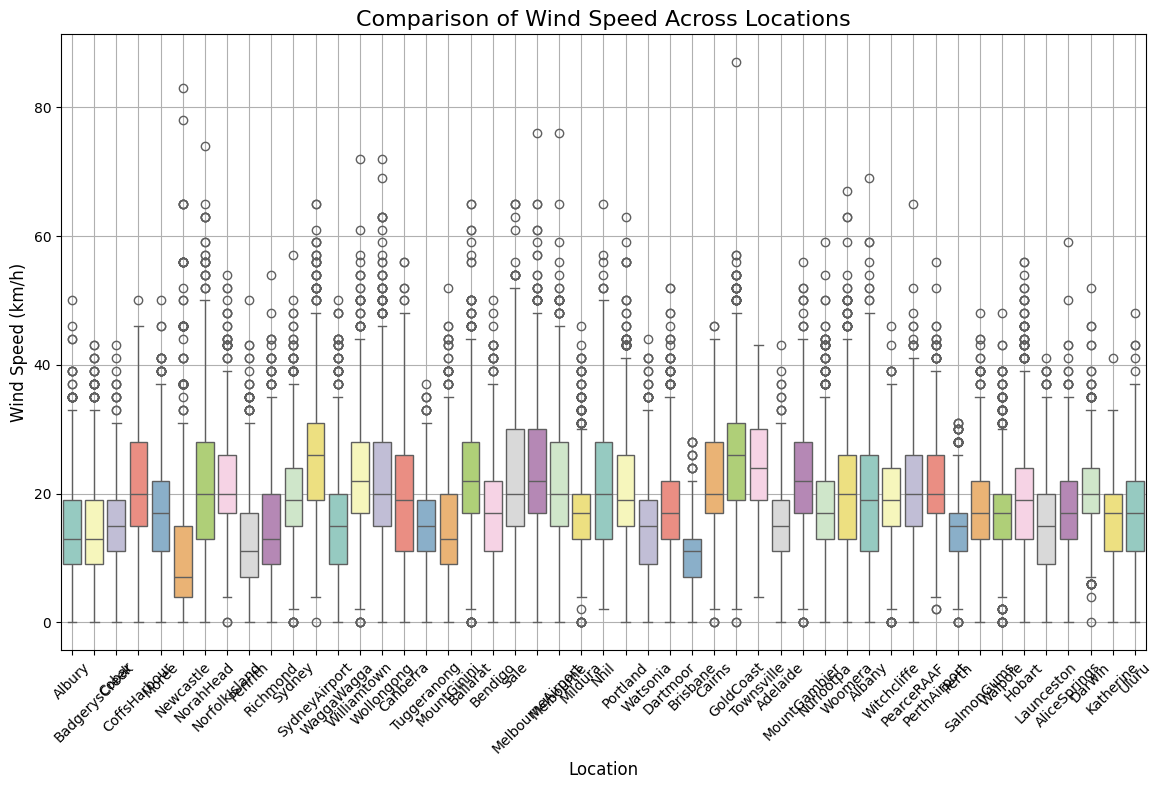

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Adjust the path as needed
weather_data = pd.read_csv(file_path)

# Define the wind speed column and location column
wind_speed_column = 'WindSpeed3pm'  # Wind speed column
location_column = 'Location'  # Location column

# Check if the columns exist in the dataset
if wind_speed_column not in weather_data.columns or location_column not in weather_data.columns:
    raise ValueError("The required columns are missing from the dataset.")

# Drop rows with missing values in 'WindSpeed3pm' or 'Location'
weather_data_clean = weather_data[[wind_speed_column, location_column]].dropna()

# Plot a box plot for wind speed comparison across locations
plt.figure(figsize=(14, 8))
sns.boxplot(data=weather_data_clean, x=location_column, y=wind_speed_column, palette='Set3')
plt.title('Comparison of Wind Speed Across Locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
